In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV



from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier


from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest


# Avaliação do modelo
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score


c:\Users\Caio\anaconda3\envs\ambiente\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Importando os dados

In [2]:
dados = pd.read_csv('C:\\Users\\Caio\\Desktop\\Credit Card Customers\\Dados\\BankChurners.csv')

In [5]:
dados['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [6]:
dados['Attrition_Flag'].replace('Existing Customer', 0, inplace=True)
dados['Attrition_Flag'].replace('Attrited Customer', 1, inplace=True)

In [7]:
features = dados.drop(['Attrition_Flag', 'CLIENTNUM',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

target = dados['Attrition_Flag']

### Divisão entre treino e teste

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.2, random_state= 101)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8101, 19)
(8101,)
(2026, 19)
(2026,)


In [45]:
# a mesma proporção de churn tanto no treino como no teste


print(y_train.value_counts(1))

print(y_test.value_counts(1))

0    0.838292
1    0.161708
Name: Attrition_Flag, dtype: float64
0    0.843534
1    0.156466
Name: Attrition_Flag, dtype: float64


### Vamos ao Pre Processing

In [46]:
# separando as variáveis categóricas das numéricas

col_categorico = [i for i in x_train.columns if x_train[i].dtype.name == 'object']

col_numerica = [i for i in x_train.columns if i not in col_categorico]

### Pipelines

In [47]:
# Pipeline Random Forest

categorico = ColumnTransformer([
    ('encoder', OneHotEncoder(handle_unknown= 'ignore'), col_categorico),
], remainder = 'passthrough')

modelo = RandomForestClassifier(class_weight = {0:3, 1:7},random_state = 42)



pipeline_rf = Pipeline(steps = [('cat',categorico),('feature_selection', SelectKBest(score_func=f_classif)),
('randomForest',modelo)])




In [13]:
# Pipeline Decision Tree

tree = DecisionTreeClassifier(class_weight= {0:3, 1:7}, random_state=42)

pipeline_tree = Pipeline(steps = [('cat',categorico),('feature_selection', SelectKBest(score_func=f_classif)),
('tree',tree)])

In [14]:
# Pipeline Logistic Regression

pipeline_cat = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])


pipeline_num = Pipeline([
    ('scaler', StandardScaler())
])


pre_processamento = ColumnTransformer([
    ('cat', pipeline_cat, col_categorico),
    ('num', pipeline_num, col_numerica)
])


pipeline_log_reg = Pipeline(steps = [('preprocessamento',pre_processamento),('feature_selection', SelectKBest(score_func=f_classif)),
('logReg',LogisticRegression(class_weight={0:3, 1:7}, random_state=42))])



In [15]:
# Treinando os três modelos ao mesmo tempo

algoritmos = [pipeline_rf, pipeline_log_reg, pipeline_tree]


for modelo in algoritmos:
    modelo.fit(x_train, y_train)

### Cross Validation

In [16]:
# Cross Validation com 5 folds

val_cruzada = KFold(n_splits = 5, shuffle = True, random_state = 53)

In [17]:
# Cross Validate com Random Forest

cross_validaterf = cross_validate(pipeline_rf, x_train, y_train, cv = val_cruzada, scoring = ['recall', 'precision', 'accuracy'])

In [18]:
recall_rf = cross_validaterf['test_recall'].mean()
precision_rf = cross_validaterf['test_precision'].mean()
accuracy_rf = cross_validaterf['test_accuracy'].mean()

In [19]:
# cross Validate com Logistic Regression

cross_validate_logReg = cross_validate(pipeline_log_reg, x_train, y_train, cv = val_cruzada, scoring = ['recall', 'precision', 'accuracy'])

In [20]:
recall_logReg = cross_validate_logReg['test_recall'].mean()
precision_logReg = cross_validate_logReg['test_precision'].mean()
accuracy_logReg = cross_validate_logReg['test_accuracy'].mean()

In [21]:
# Cross Validate com Decision Tree

cross_validate_tree = cross_validate(pipeline_tree, x_train, y_train, cv = val_cruzada, scoring = ['recall', 'precision', 'accuracy'])

In [22]:
recall_tree = cross_validate_tree['test_recall'].mean()
precision_tree = cross_validate_tree['test_precision'].mean()
accuracy_tree = cross_validate_tree['test_accuracy'].mean()

### Comparativo entre os modelos

In [23]:
print("Comparativo entre os Modelos:")
print("_____________________________")

print("\n")

print("Random Forest Metrics Cross Validation:")
print(" Accuracy Mean: {}".format(accuracy_rf))
print(" Precision Mean: {}".format(precision_rf))
print(" Recall Mean: {}".format(recall_rf))

print("\n")

print("Logistic Regression Metrics Cross Validation:")


print(" Accuracy Mean: {}".format(accuracy_logReg))
print(" Precision Mean: {}".format(precision_logReg))
print(" Recall  Mean: {}".format(recall_logReg))

print("\n")

print("Decision Tree Metrics Cross Validation:")


print(" Accuracy Mean: {}".format(accuracy_tree))
print(" Precision Mean: {}".format(precision_tree))
print(" Recall Mean: {}".format(recall_tree))

Comparativo entre os Modelos:
_____________________________


Random Forest Metrics Cross Validation:
 Accuracy Mean: 0.9617322792667229
 Precision Mean: 0.9227465277301373
 Recall Mean: 0.8330223275689679


Logistic Regression Metrics Cross Validation:
 Accuracy Mean: 0.8874204309182717
 Precision Mean: 0.6297468837516329
 Recall  Mean: 0.7382724386606825


Decision Tree Metrics Cross Validation:
 Accuracy Mean: 0.9308726513887937
 Precision Mean: 0.7901926471349566
 Recall Mean: 0.7780981371367948


### Iremos selecionar o Random Forest pois aparenta ser o mais promissor para esse problema específico

#### Tunando somente um hiperparametro e selecionando as melhores features com base no teste F

In [24]:
params = {'randomForest__n_estimators': [10, 20, 30, 50],
          'feature_selection__k': [11,12,10,13]}


rf_grid = GridSearchCV(estimator= pipeline_rf, 
                      param_grid= params, 
                      scoring = 'accuracy',
                      cv = 3,
                      n_jobs= -1)

In [25]:
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cat',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('feature_selection', SelectKBest()),
                                       ('randomForest',
                                        RandomForestClassifier(class_weight={0: 3,
                                                                             1: 7},
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [11, 12, 10, 13],
                         'randomForest__n_estimators': [10, 20, 30, 50]},
             scoring='accuracy')

In [26]:
print(rf_grid.score(x_train, y_train))

0.9997531168991483


## Quais foram as variáveis selecionadas ?

In [27]:
selected = rf_grid.best_estimator_.named_steps['feature_selection']

best_features_ix = selected.get_support()

x_train_trans = categorico.fit_transform(x_train)

colunas = categorico.get_feature_names_out()

best_features = [colunas[counter] for counter in range(len(colunas)) if best_features_ix[counter]]

In [29]:
for i in best_features:
    print(i)

encoder__Gender_F
encoder__Gender_M
encoder__Education_Level_Doctorate
remainder__Total_Relationship_Count
remainder__Months_Inactive_12_mon
remainder__Contacts_Count_12_mon
remainder__Total_Revolving_Bal
remainder__Total_Amt_Chng_Q4_Q1
remainder__Total_Trans_Amt
remainder__Total_Trans_Ct
remainder__Total_Ct_Chng_Q4_Q1
remainder__Avg_Utilization_Ratio


## Vamos terminar a tunagem

In [30]:
rf_grid.best_params_

{'feature_selection__k': 12, 'randomForest__n_estimators': 50}

In [31]:
# Atualizando com os parametros 
modelo = RandomForestClassifier(class_weight = {0:3, 1:7},n_estimators= 50,random_state = 42)



pipeline_rf = Pipeline(steps = [('cat',categorico),('feature_selection', SelectKBest(score_func=f_classif, k=12)),
('randomForest',modelo)])

In [32]:
params = {'randomForest__min_samples_split': [4,6,10,13],  # usar 2 (DOIS) __
          'randomForest__min_samples_leaf': [4,7,10,15],
          'randomForest__max_features': ['auto', 'sqrt'],
          'randomForest__max_depth': [10,20,30,50]
}


rf_grid = GridSearchCV(estimator= pipeline_rf, 
                      param_grid= params, 
                      scoring = 'accuracy',
                      cv = 3,
                      n_jobs= -1)

In [33]:
rf_grid.fit(x_train, y_train)

c:\Users\Caio\anaconda3\envs\ambiente\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cat',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'Education_Level',
                                                                          'Marital_Status',
                                                                          'Income_Category',
                                                                          'Card_Category'])])),
                                       ('feature_selection', SelectKBest(k=12)),
                                       ('randomForest',
                                        RandomForestClassifier(class_weight={0: 3,
                                                                             1: 7},
                                                               n_estimators=50,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'randomForest__max_depth': [10, 20, 30, 50],
                         'randomForest__max_features': ['auto', 'sqrt'],
                         'randomForest__min_samples_leaf': [4, 7, 10, 15],
                         'randomForest__min_samples_split': [4, 6, 10, 13]},
             scoring='accuracy')

In [34]:
print(rf_grid.score(x_train, y_train))

0.9844463646463399


In [35]:
rf_grid.best_params_

{'randomForest__max_depth': 20,
 'randomForest__max_features': 'auto',
 'randomForest__min_samples_leaf': 4,
 'randomForest__min_samples_split': 10}

In [36]:
val_cruzada = KFold(n_splits = 5, shuffle = True, random_state = 53)

In [37]:
cross_validate(rf_grid, x_train, y_train, cv = val_cruzada, scoring = ['recall', 'precision', 'accuracy'])

c:\Users\Caio\anaconda3\envs\ambiente\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Caio\anaconda3\envs\ambiente\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Caio\anaconda3\envs\ambiente\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this paramet

{'fit_time': array([36.39838529, 37.9638567 , 34.09944153, 34.43526745, 34.67217636]),
 'score_time': array([0.02408171, 0.03746772, 0.02402186, 0.03452206, 0.02407885]),
 'test_recall': array([0.9       , 0.87096774, 0.82846715, 0.83461538, 0.83268482]),
 'test_precision': array([0.86055777, 0.87725632, 0.86641221, 0.875     , 0.87704918]),
 'test_accuracy': array([0.96360271, 0.95679012, 0.94938272, 0.95432099, 0.95493827])}

## Somente agora vamos a base de teste

In [38]:
y_pred = rf_grid.predict(x_test)

#### Métricas do nosso modelo com a base de teste

In [39]:
print("Precision Score: {}".format(precision_score(y_test, y_pred)))
print("Recall Score: {}".format(recall_score(y_test, y_pred)))
print("F1 Score: {}".format(f1_score(y_test, y_pred)))
print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))


Precision Score: 0.834319526627219
Recall Score: 0.889589905362776
F1 Score: 0.8610687022900764
Accuracy Score: 0.9550839091806516


In [40]:
print(confusion_matrix(y_test,y_pred))

[[1653   56]
 [  35  282]]


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1709
           1       0.83      0.89      0.86       317

    accuracy                           0.96      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026



#### Curva ROC

In [42]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

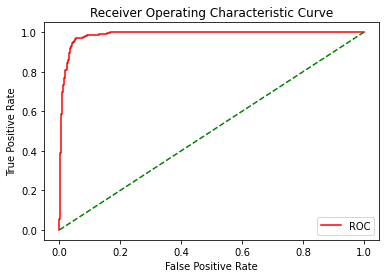

In [43]:
prob = rf_grid.predict_proba(x_test)

prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)

In [44]:
print("ROC AUC SCORE: {}".format(roc_auc_score(y_test, prob)))

ROC AUC SCORE: 0.9868648627695646
